In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
%matplotlib inline
from sklearn.metrics import explained_variance_score,r2_score, max_error, mean_absolute_error, median_absolute_error, mean_squared_error
from math import sqrt

In [75]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [76]:
init_notebook_mode(connected=True)
cf.go_offline()

In [77]:
df=pd.read_csv('LPGPROPANE.csv')

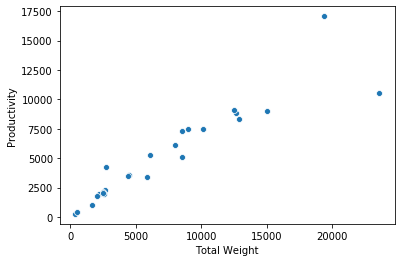

In [78]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [79]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,25.000000,25.000000,25.000,25.000,25.000000,25.000000,25.000000,25.0,25.0,25.0,25.000000,21.000000
mean,89.440000,199378.400000,1.088,1.158,7227.303240,0.073600,0.007360,0.0,0.0,0.0,5197.122000,43431.142857
std,17.041811,2883.103074,5.440,5.790,6059.285829,0.060682,0.006068,0.0,0.0,0.0,3940.336592,13820.315833
min,56.000000,192752.000000,0.000,0.000,358.000000,0.000000,0.000000,0.0,0.0,0.0,257.250000,3995.000000
25%,80.000000,200304.000000,0.000,0.000,2500.000000,0.030000,0.003000,0.0,0.0,0.0,2076.120000,41276.000000
50%,90.000000,200604.000000,0.000,0.000,5848.780000,0.060000,0.006000,0.0,0.0,0.0,4232.010000,49753.000000
75%,103.000000,200679.000000,0.000,0.000,10140.000000,0.100000,0.010000,0.0,0.0,0.0,7474.050000,51826.000000
max,115.000000,200920.000000,27.200,28.950,23592.000000,0.240000,0.024000,0.0,0.0,0.0,17064.710000,58691.000000


In [80]:
df=df[df['Productivity']<15000]
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,24.000000,24.000000,24.0,24.0,24.000000,24.000000,24.000000,24.0,24.0,24.0,24.000000,20.000000
mean,89.625000,199328.708333,0.0,0.0,6722.607542,0.068750,0.006875,0.0,0.0,0.0,4702.639167,43538.900000
std,17.382681,2934.156000,0.0,0.0,5627.293834,0.056823,0.005682,0.0,0.0,0.0,3134.118665,14170.290867
min,56.000000,192752.000000,0.0,0.0,358.000000,0.000000,0.000000,0.0,0.0,0.0,257.250000,3995.000000
25%,79.000000,200283.000000,0.0,0.0,2500.000000,0.030000,0.003000,0.0,0.0,0.0,2050.760000,41276.000000
50%,92.000000,200623.500000,0.0,0.0,5163.390000,0.050000,0.005000,0.0,0.0,0.0,3883.635000,49753.000000
75%,103.250000,200679.000000,0.0,0.0,9285.000000,0.092500,0.009250,0.0,0.0,0.0,7467.285000,51859.500000
max,115.000000,200920.000000,0.0,0.0,23592.000000,0.240000,0.024000,0.0,0.0,0.0,10504.790000,58691.000000


In [81]:
df=df[df['Total Weight']<20000]
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,23.000000,23.000000,23.0,23.0,23.000000,23.000000,23.000000,23.0,23.0,23.0,23.000000,19.000000
mean,89.956522,199281.652174,0.0,0.0,5989.155696,0.061304,0.006130,0.0,0.0,0.0,4450.371739,43102.736842
std,17.695604,2990.826575,0.0,0.0,4428.106185,0.044549,0.004455,0.0,0.0,0.0,2944.898884,14419.999938
min,56.000000,192752.000000,0.0,0.0,358.000000,0.000000,0.000000,0.0,0.0,0.0,257.250000,3995.000000
25%,78.000000,200262.000000,0.0,0.0,2500.000000,0.030000,0.003000,0.0,0.0,0.0,2025.400000,41276.000000
50%,94.000000,200643.000000,0.0,0.0,4478.000000,0.040000,0.004000,0.0,0.0,0.0,3535.260000,49753.000000
75%,103.500000,200679.000000,0.0,0.0,8750.000000,0.090000,0.009000,0.0,0.0,0.0,7375.370000,51717.000000
max,115.000000,200920.000000,0.0,0.0,15000.000000,0.150000,0.015000,0.0,0.0,0.0,9067.290000,58691.000000


In [82]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1)

In [83]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
print(lm.intercept_)

708.4515651802049


In [85]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.613796


In [86]:
predictions = lm.predict(X_test)

In [87]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test, predictions))

MAE: 561.5198148303654
MSE: 473712.7365237619
RMSE: 688.2679249563805
r2_score: 0.9484400392775547


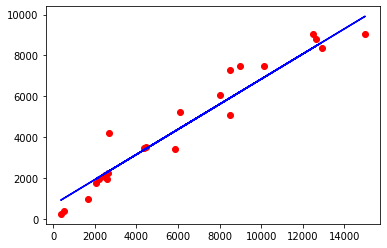

In [88]:
plt.scatter(X,y, color='red')
plt.plot(X_test, predictions,color="blue")

In [89]:
joblib.dump(lm,"Lpg_Propane.pkl")#only execute if rmse is less than half of mean of productivity

['Lpg_Propane.pkl']